In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
SOI = pd.read_csv('southern_osc.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [94]:

SOI = pd.read_csv('southern_osc.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
SOI = SOI.reset_index()
def padYear(Date):
    i = Date.find('-')
    if int(Date[-2:]) > 22:
        return Date[:i+1]+'19'+Date[i+1:]
    else: 
        return Date[:i+1]+'20'+Date[i+1:]
    
SOI.Date = SOI.Date.apply(padYear)
SOI.Date = pd.to_datetime(SOI.Date, format='%b-%Y')

In [95]:
SOI.columns = ['Date', 'SOI']

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional in

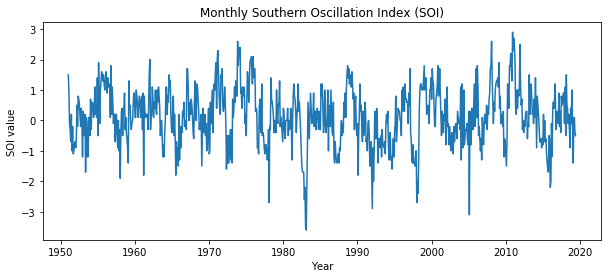

In [96]:
plt.figure(figsize=(10,4))
plt.plot(SOI.Date, SOI.SOI)
plt.xlabel('Year')
plt.ylabel('SOI value')
plt.title('Monthly Southern Oscillation Index (SOI)')
plt.savefig('SOI.png', transparent=True)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


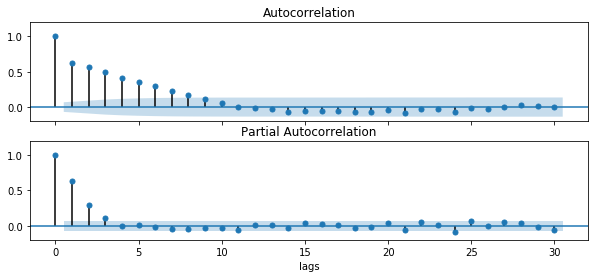

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(10,4),nrows=2, ncols=1, sharex=True, sharey=True)

plot_acf(SOI.SOI, ax=ax[0])
plot_pacf(SOI.SOI, ax=ax[1])
plt.xlabel('lags')

ax[0].set_ylim((-0.2,1.2))
plt.savefig('SOIacfpacf.png', transparent=True)

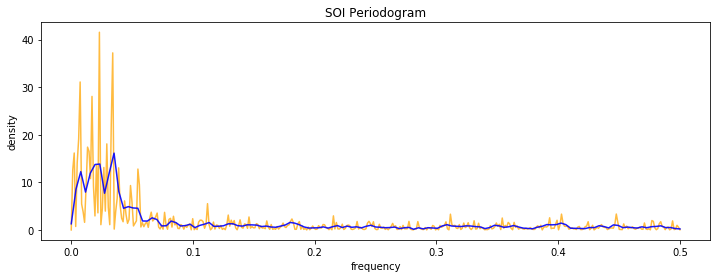

In [98]:
plt.figure(figsize=(12,4))



f, Pxx_den = signal.periodogram(SOI.SOI)
plt.plot(f, Pxx_den, color='orange', alpha=0.75)

f, Pxx_den = signal.welch(SOI.SOI)
plt.plot(f, Pxx_den, color='blue', alpha=0.9)
plt.xlabel('frequency')
plt.ylabel('density')
plt.title('SOI Periodogram')

# plt.vlines([2/139], ymin=0, ymax=5000)
# plt.vlines([7/139], ymin=0, ymax=5000)
# plt.vlines([f[np.argmax(Pxx_den)]], ymin=0, ymax=5000)


plt.savefig('SOIPer.png', transparent=True)

19

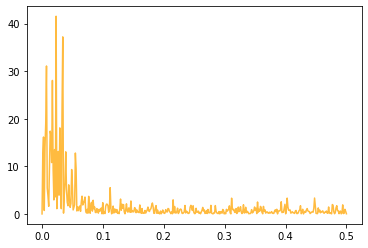

In [107]:
f, Pxx_den = signal.periodogram(SOI.SOI)
plt.plot(f, Pxx_den, color='orange', alpha=0.75)

np.argmax(Pxx_den)

In [108]:
nYears = 2019-1951
nYears * 19/412

3.1359223300970873

In [109]:
19/412

0.04611650485436893

In [110]:
np.argmax(Pxx_den)

19

In [111]:

df = pd.DataFrame({'f':f, 'P':Pxx_den})
df.sort_values('P', ascending=False)

f             P
19   0.023114  4.154535e+01
28   0.034063  3.720677e+01
6    0.007299  3.109171e+01
14   0.017032  2.805829e+01
27   0.032847  2.203697e+01
..        ...           ...
353  0.429440  7.710911e-03
246  0.299270  6.153284e-03
159  0.193431  4.886146e-03
318  0.386861  4.812812e-03
0    0.000000  5.760508e-31

[412 rows x 2 columns]

In [112]:
df

f             P
0    0.000000  5.760508e-31
1    0.001217  1.260717e+01
2    0.002433  1.616461e+01
3    0.003650  7.223054e-01
4    0.004866  1.405239e+01
..        ...           ...
407  0.495134  7.640234e-02
408  0.496350  1.633711e-01
409  0.497567  9.686229e-01
410  0.498783  5.501334e-01
411  0.500000  3.547445e-02

[412 rows x 2 columns]

In [105]:
28/412

0.06796116504854369

In [13]:
SOI.Date[0]

Timestamp('1951-01-01 00:00:00')

In [14]:
SOI.Date.iloc[-1]

Timestamp('2019-06-01 00:00:00')

In [15]:
len(SOI)/2 +1

412.0

In [50]:
def S(omega):
    t_arr = np.linspace(0, 1, len(SOI))
    _s = np.sum(np.array(SOI.SOI)*np.exp(-2*np.pi*t_arr*1j*omega))
    _s = np.abs(_s)**2
    return _s/len(SOI)

vS = np.vectorize(S)

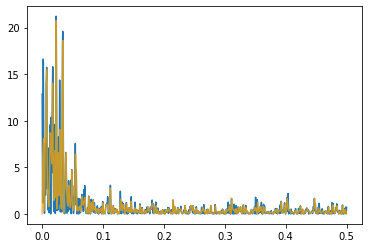

In [92]:
# omega_arr = np.linspace(0,0.5*len(SOI), int(len(SOI)/2)+1)
omega_arr = np.linspace(0,0.5*len(SOI), 5000)


plt.plot(omega_arr/len(SOI), vS(omega_arr))
plt.plot(f, Pxx_den/2, color='orange', alpha=0.75)

In [90]:
df = pd.DataFrame({'f':f, 'P':Pxx_den})
df.sort_values('P', ascending=False)

f             P
19   0.023114  4.154535e+01
28   0.034063  3.720677e+01
6    0.007299  3.109171e+01
14   0.017032  2.805829e+01
27   0.032847  2.203697e+01
..        ...           ...
353  0.429440  7.710911e-03
246  0.299270  6.153284e-03
159  0.193431  4.886146e-03
318  0.386861  4.812812e-03
0    0.000000  5.760508e-31

[412 rows x 2 columns]

In [91]:
df = pd.DataFrame({'f':omega_arr/len(SOI), 'P':vS(omega_arr)})
df.sort_values('P', ascending=False)

f          P
46   0.023023  21.157603
67   0.033534  18.907347
68   0.034034  18.497838
15   0.007508  15.546848
4    0.002002  15.345051
..        ...        ...
28   0.014014   0.000794
799  0.399900   0.000643
824  0.412412   0.000542
809  0.404905   0.000327
533  0.266767   0.000184

[1000 rows x 2 columns]

In [103]:
len(f)

412